In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import plotly.express as px

In [2]:
# loading file
hotel_df = pd.read_csv('Hotel Reservations.csv')

In [3]:
# checking the dataframe
hotel_df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [31]:
hotel_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
# displaying the shape of the dataset
print("Shape of the hotel dataset:", hotel_df.shape)
print("-----------------------------------------------")

# checking for missing values
print("Missing values in the hotel dataset:")
print(hotel_df.isnull().sum())
print("-----------------------------------------------")

# calculating summary statistics
print("Summary statistics of the hotel df dataset:")
description = hotel_df.describe()
description = description.round(2)
print(description)

Shape of the hotel dataset: (36275, 19)
-----------------------------------------------
Missing values in the hotel dataset:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
-----------------------------------------------
Summary statisti

In [5]:
# Descriptive statistics of the selected columns
# columns_for_stats = hotel_df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
#                                    'arrival_year', 'arrival_month', 'arrival_date',
#                                    'market_segment_type', 'no_of_special_requests', 'booking_status'], axis=1)

# print("Descriptive statistics of the selected columns:")
# description = columns_for_stats.describe()
# description = description.round(2)
# print(description)

# Correlation heatmap

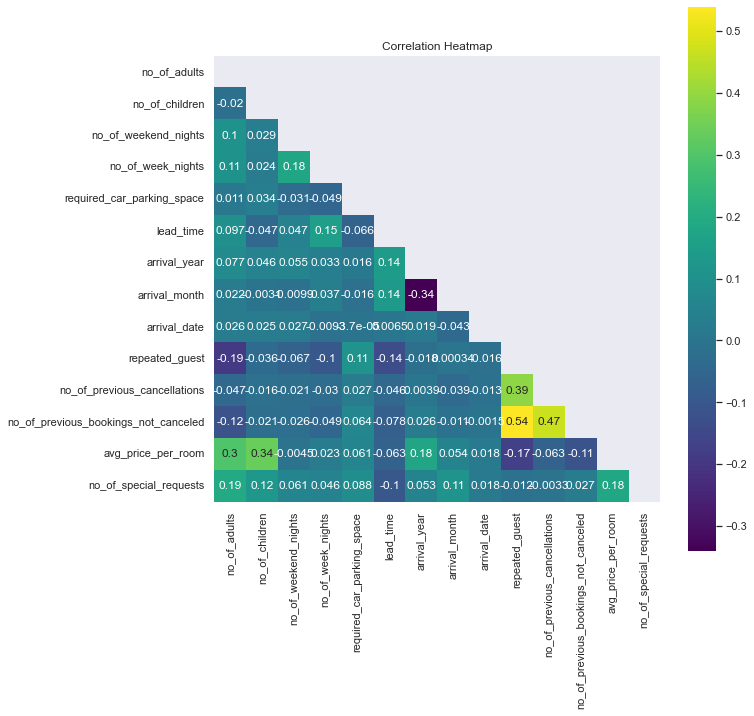

In [6]:
# creating a correlation matrix
corr = hotel_df.corr()

# generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# setting up the figure
plt.figure(figsize=(10, 10))

# customizing the colors and the correlation matrix
sns.heatmap(corr, mask=mask, annot=True, cmap='viridis', square=True)

# title for the heatmap
plt.title('Correlation Heatmap')

# displaying the plot
plt.show()

In [7]:
# # printing the correlation as a table
# print("Correlation table of the hotel dataset:")
# print(hotel_df.corr())

# Pairplot 

### A pairplot is being used for:

- **Visual Exploration of Relationships**: A pair plot provides a visual matrix of scatterplots for pairs of numerical variables in the dataset, offering an immediate view of relationships.
- **Comprehensive Understanding**: It helps in comprehending interactions, dependencies, and potential correlations between variables by displaying their pairwise relationships.
- **Pattern Identification**: Enables the identification of patterns, trends, or potential clusters within the data by visualizing how variables relate to each other.
- **Distribution Visualization**: Shows individual variable distributions along the diagonal, aiding in understanding their spread, shape, and central tendencies.
- **Outlier Detection**: Facilitates the detection of outliers or anomalies that might deviate significantly from expected patterns in specific variable pairings.
- **Insight Generation**: Assists in generating insights for feature selection, engineering, or understanding which variables might be more influential or strongly related.
- **Initial Exploratory Step**: Serves as an initial step in exploratory data analysis (EDA), providing an overview of relationships before diving deeper into specific analyses or modeling processes.

In [ ]:
# selecting a subset of numeric variables
columns_for_pairplot = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                        'no_of_week_nights', 'required_car_parking_space',
                        'lead_time', 'no_of_previous_cancellations',
                        'no_of_previous_bookings_not_canceled',
                        'avg_price_per_room', 'no_of_special_requests']

# creating the figure 
sns.pairplot(hotel_df, vars=columns_for_pairplot, hue='booking_status')
plt.show()

# Exploratory Analysis of the Dataset (EDA)

## Creation of boxplots for:

- **Visualizing Distribution**: Box plots depict the distribution of numerical data and show the central tendency (median) and spread (quartiles) in a concise manner.
- **Identifying Outliers**: They effectively display outliers as individual data points beyond the "whiskers," aiding in outlier detection.
- **Comparing Groups**: Box plots allow comparison of the distributional properties of numerical data across different categories or groups.
- **Summarizing Data**: They provide a visual summary of the data's central tendency, dispersion, skewness, and potential asymmetry.
- **Handling Skewed Data**: Box plots are robust against outliers and work well for skewed distributions, showing the data's overall shape.
- **Assessing Symmetry**: The shape of the box plot helps in assessing the symmetry or asymmetry of the data distribution.
- **Spotting Variability**: Whiskers and the length of the box highlight the variability or spread of the dataset.

<Figure size 1080x720 with 0 Axes>

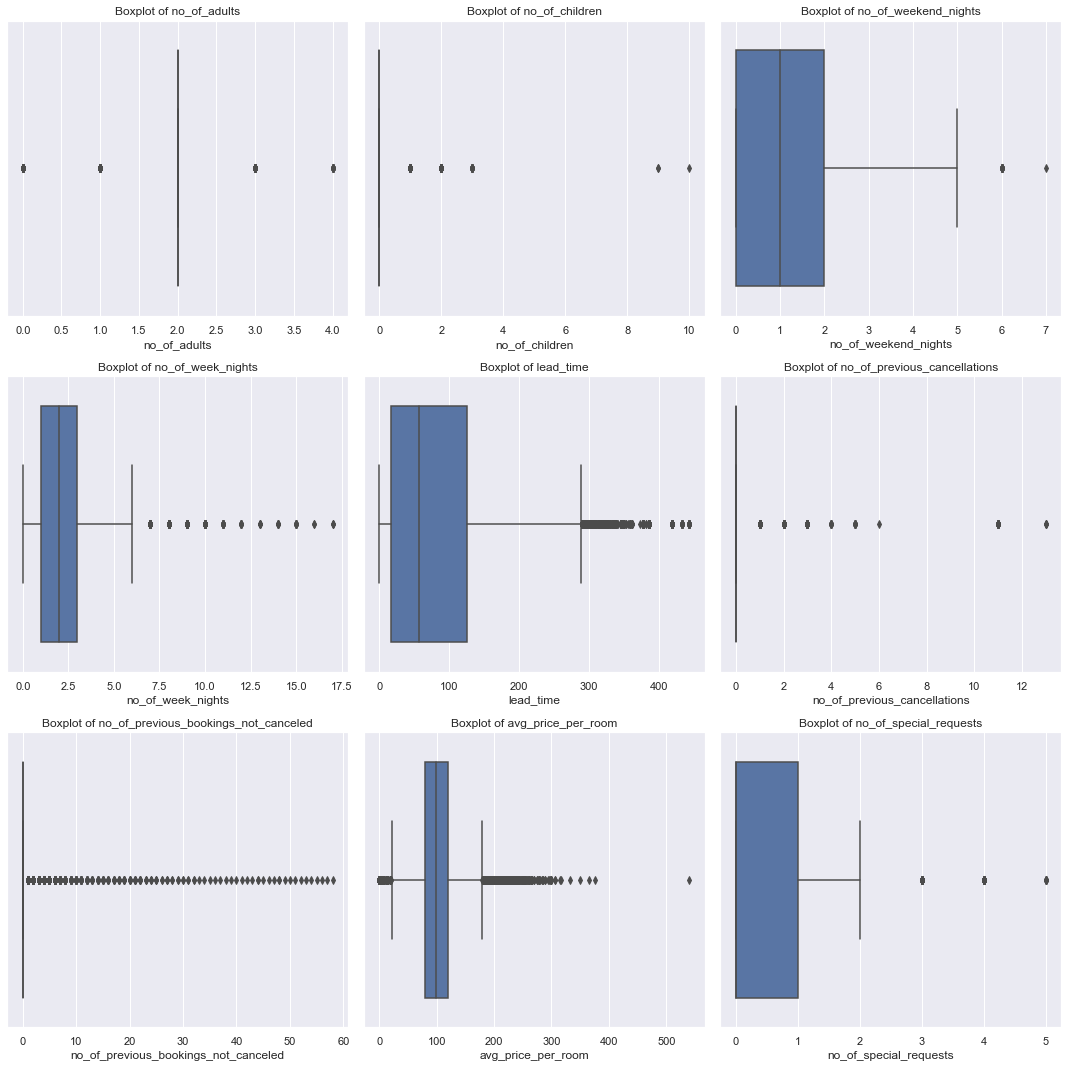

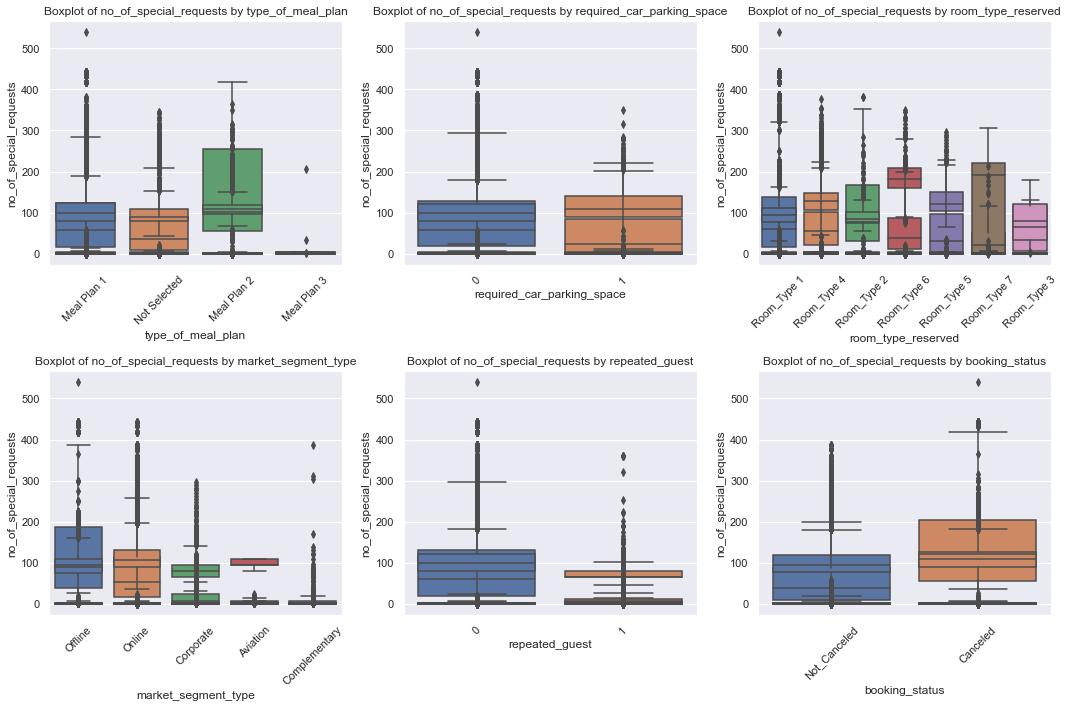

In [41]:
# setting the size of the figures
plt.figure(figsize=(15, 10))  # adjusting width and height

# creation of the numerical variables for box plots
numerical_vars = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                  'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                  'no_of_special_requests']

# creation of the categorical variables against numerical variables for box plots
categorical_vars = ['type_of_meal_plan', 'required_car_parking_space',
                    'room_type_reserved', 'market_segment_type', 'repeated_guest',
                    'booking_status']

# creating subplots for numerical variables
num_plots_per_row = 3  # number of numerical plots per row
num_numerical = len(numerical_vars)
num_rows = -(-num_numerical // num_plots_per_row)  # ceiling division to determine the number of rows

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))

for i, var in enumerate(numerical_vars):
    ax = axes[i // num_plots_per_row, i % num_plots_per_row] if num_rows > 1 else axes[i % num_plots_per_row]
    sns.boxplot(x=var, data=hotel_df, ax=ax)
    ax.set_title(f'Boxplot of {var}')

# adjusting layout and spacing
plt.tight_layout()
plt.show()

# creating subplots for categorical variables against numerical variables
plt.figure(figsize=(15, 10))  # adjusting width and height

for j, cat_var in enumerate(categorical_vars):
    plt.subplot(2, 3, j+1)  # 2 rows, 3 columns for categorical plots
    for i, num_var in enumerate(numerical_vars):
        ax = sns.boxplot(x=cat_var, y=num_var, data=hotel_df)
        ax.set_title(f'Boxplot of {num_var} by {cat_var}')
        plt.xticks(rotation=45)  # rotating x-axis labels by 45 degrees for better readability

plt.tight_layout()
plt.show()

In [8]:
# calculating the sum of no_of_adults for every month
print("Sum of no_of_adults for every month:")
print(hotel_df.groupby('arrival_month')['no_of_adults'].sum())

Sum of no_of_adults for every month:
arrival_month
1     1651
2     2888
3     4432
4     5178
5     4782
6     5663
7     5791
8     7651
9     8493
10    9504
11    5164
12    5729
Name: no_of_adults, dtype: int64


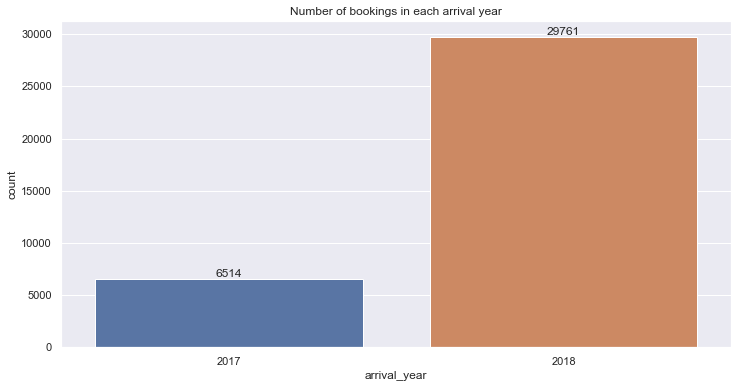

In [9]:
# plotting the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='arrival_year', data=hotel_df)
plt.title('Number of bookings in each arrival year')

# adding count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [10]:
# average number of adults for bookings
avg_adults_per_room_type = hotel_df.groupby('room_type_reserved')['no_of_adults'].mean() 
print(avg_adults_per_room_type)

room_type_reserved
Room_Type 1    1.770316
Room_Type 2    1.579480
Room_Type 3    1.571429
Room_Type 4    2.192505
Room_Type 5    1.739623
Room_Type 6    1.994824
Room_Type 7    2.246835
Name: no_of_adults, dtype: float64


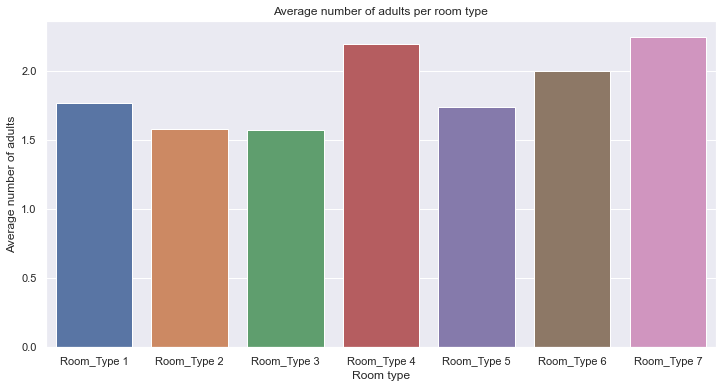

In [11]:
# visualizing the average number of adults per room
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_adults_per_room_type.index, y=avg_adults_per_room_type.values)
plt.title('Average number of adults per room type')
plt.xlabel('Room type')
plt.ylabel('Average number of adults')
plt.show()

In [12]:
# average number of children for bookings
avg_children_per_room_type = hotel_df.groupby('room_type_reserved')['no_of_children'].mean() 
print(avg_children_per_room_type)

room_type_reserved
Room_Type 1    0.049378
Room_Type 2    0.588150
Room_Type 3    0.000000
Room_Type 4    0.038138
Room_Type 5    0.132075
Room_Type 6    1.688406
Room_Type 7    0.797468
Name: no_of_children, dtype: float64


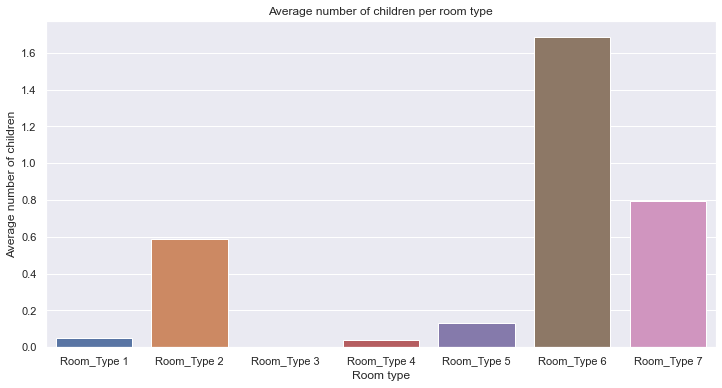

In [13]:
# visualizing the average number of children per room
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_children_per_room_type.index, y=avg_children_per_room_type.values)
plt.title('Average number of children per room type')
plt.xlabel('Room type')
plt.ylabel('Average number of children')
plt.show()

In [14]:
# value counts for bookings per month
monthly_bookings = hotel_df['arrival_month'].value_counts().sort_index().reset_index()
monthly_bookings.columns = ['Month', 'Number of Bookings']

fig = px.bar(
    monthly_bookings,
    x='Month',
    y='Number of Bookings',
    color='Number of Bookings',
    color_continuous_scale='blues',
    labels={'Number of Bookings': '# of Bookings'},
    title='Bookings per month'
)

fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='# of Bookings'),
    xaxis_tickangle=-45,
    bargap=0.2,
    height=500,
    width=800
)

fig.show()

1       24
2      430
3      700
4      995
5      948
6     1291
7     1314
8     1488
9     1538
10    1880
11     875
12     402
Name: arrival_month, dtype: int64


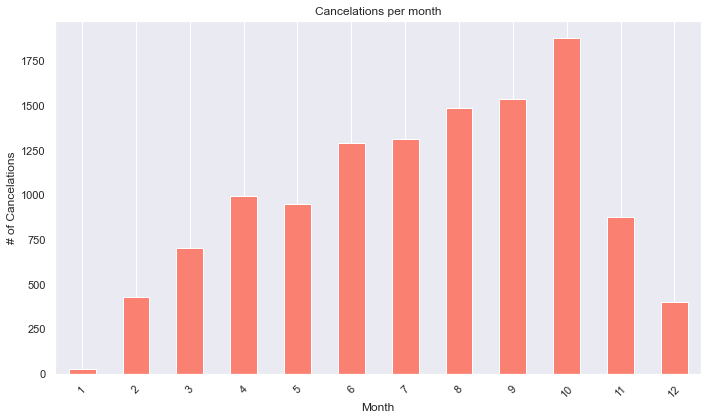

In [15]:
# cancellations per month
cancellations_by_month = hotel_df[hotel_df['booking_status'] == "Canceled"]['arrival_month'].value_counts().sort_index()
print(cancellations_by_month)

# creating the figure
plt.figure(figsize=(10, 6))
cancellations_by_month.plot(kind='bar', color='salmon')
plt.title('Cancelations per month')
plt.xlabel('Month')
plt.ylabel('# of Cancelations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# plotting the graph
plt.tight_layout()
plt.show()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


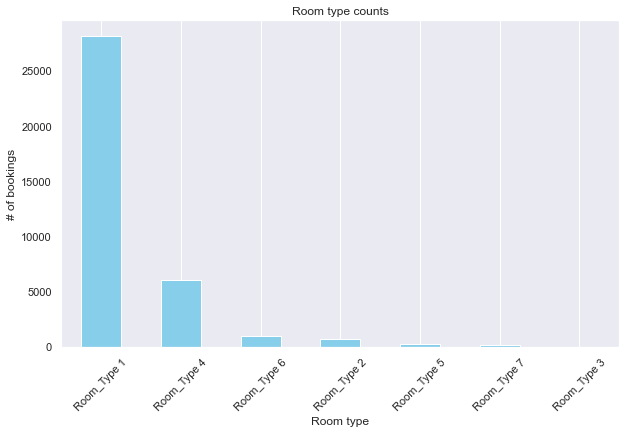

In [16]:
# value counts for room type
room_type_counts = hotel_df['room_type_reserved'].value_counts()
print(room_type_counts)

# plotting the graph
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Room type counts')
plt.xlabel('Room type')
plt.ylabel('# of bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

arrival_month
1      74.749763
2      80.733644
3      91.883698
4     101.998801
5     113.810677
6     111.966500
7     111.649318
8     113.203984
9     115.906916
10    104.460873
11     91.285426
12     88.952185
Name: avg_price_per_room, dtype: float64


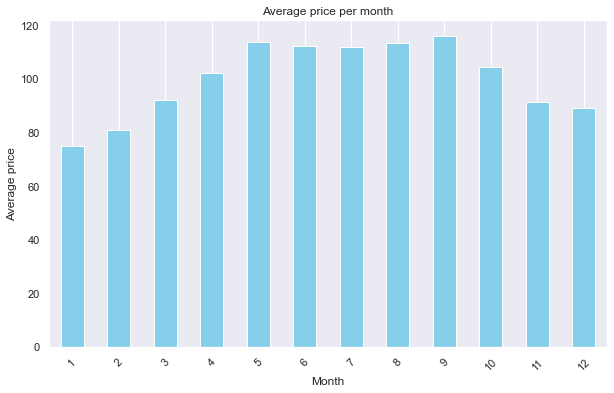

In [17]:
# average price of rooms per month
avg_price_per_month = hotel_df.groupby('arrival_month')['avg_price_per_room'].mean()
print(avg_price_per_month)

# plotting the graph
plt.figure(figsize=(10, 6))
avg_price_per_month.plot(kind='bar', color='skyblue')
plt.title('Average price per month')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


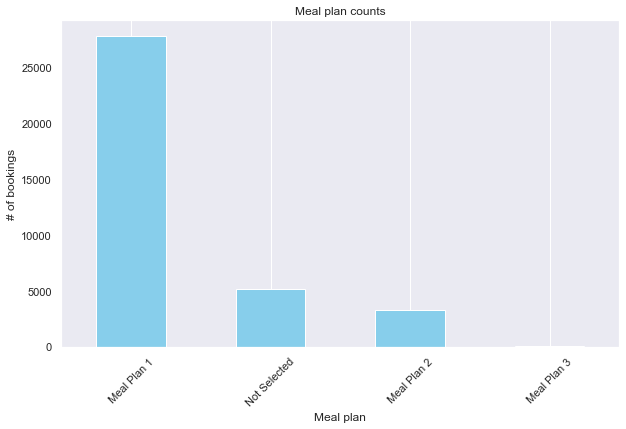

In [18]:
# type of meal plan selected by each booking
meal_plan_counts = hotel_df['type_of_meal_plan'].value_counts()
print(meal_plan_counts)

# plotting the graph
plt.figure(figsize=(10, 6))
meal_plan_counts.plot(kind='bar', color='skyblue')
plt.title('Meal plan counts')
plt.xlabel('Meal plan')
plt.ylabel('# of bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64


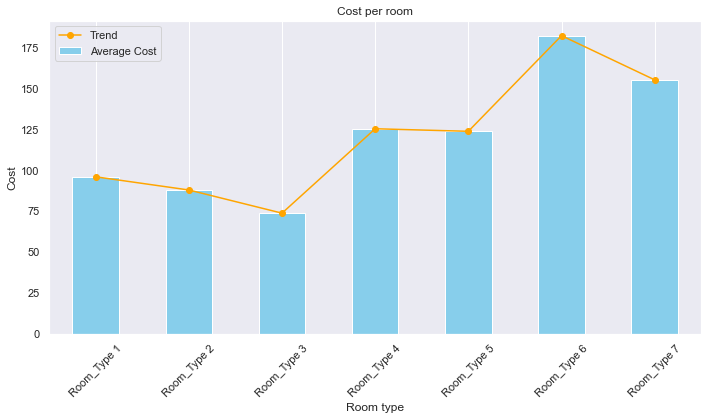

In [19]:
# cost per room
cost_per_room = hotel_df.groupby('room_type_reserved')['avg_price_per_room'].mean()
print(cost_per_room)

plt.figure(figsize=(10, 6))

# creating a bar plot for cost per room
cost_per_room.plot(kind='bar', color='skyblue', label='Average Cost')

# adding a line plot to show the trend
plt.plot(cost_per_room.index, cost_per_room.values, marker='o', color='orange', linestyle='-', label='Trend')

# customizing the figure and displaying 
plt.title('Cost per room')
plt.xlabel('Room type')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

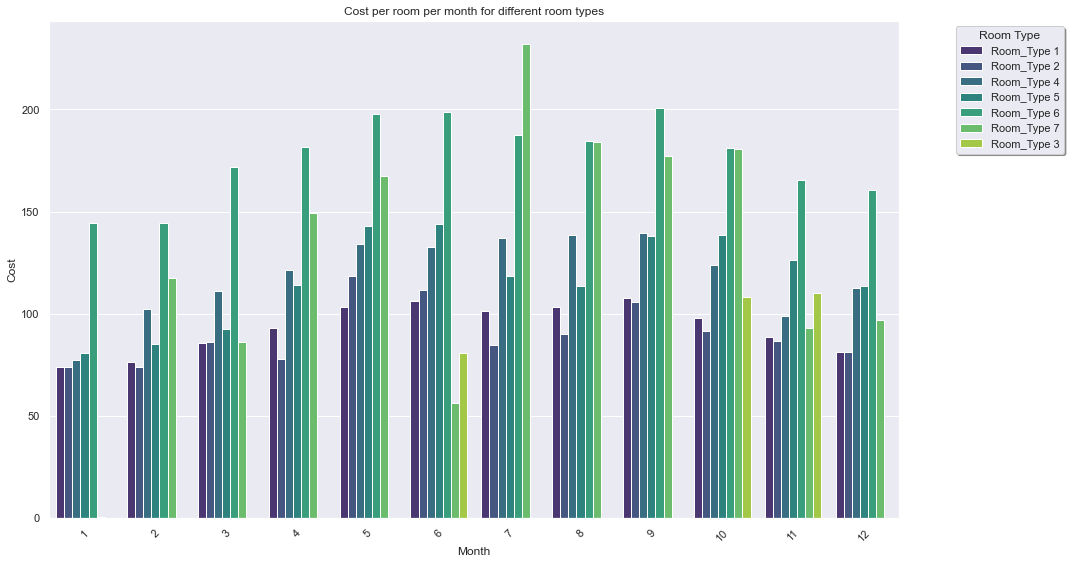

In [20]:
# costs per room in different months
cost_per_room_month = hotel_df.groupby(['arrival_month', 'room_type_reserved'])['avg_price_per_room'].mean()
# print(cost_per_room_month)

# reseting the index to convert the grouped data back into a DataFrame
cost_per_room_month = cost_per_room_month.reset_index()

# creating a bar plot for each room type and manage legend
plt.figure(figsize=(15, 8))
sns.barplot(
    x='arrival_month',
    y='avg_price_per_room',
    hue='room_type_reserved',
    data=cost_per_room_month,
    palette='viridis',
)

plt.legend(title='Room Type', loc='upper right', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.title('Cost per room per month for different room types')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

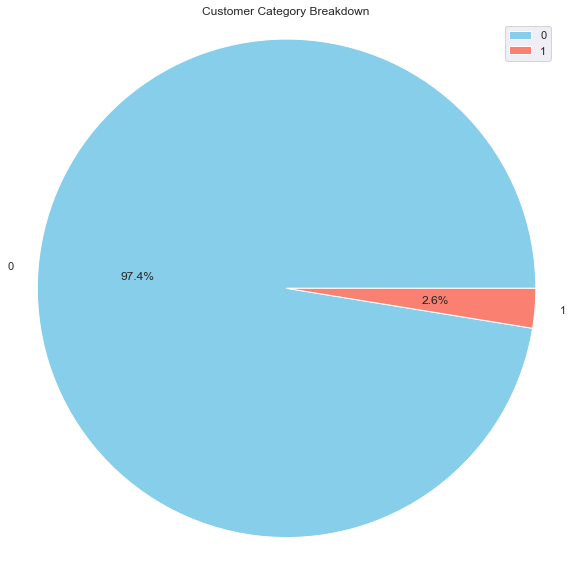

In [21]:
# breakdown of bookings by customer category: repeated or new customers
customer_category_counts = hotel_df['repeated_guest'].value_counts()

plt.figure(figsize=(8, 8))

# creating a pie chart
plt.pie(customer_category_counts, labels=customer_category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Category Breakdown')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.tight_layout()
plt.show()

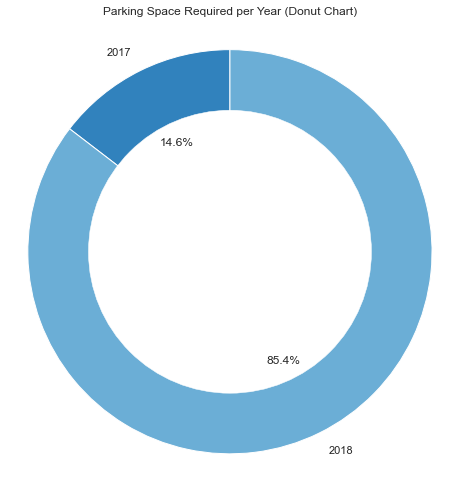

In [22]:
# number of required parking space per year
parking_space_per_year = hotel_df.groupby('arrival_year')['required_car_parking_space'].sum()

# creating figure for donut chart
plt.figure(figsize=(8, 8))

# calculating percentages
parking_space_percentage = parking_space_per_year / parking_space_per_year.sum() * 100

# plotting the donut chart
plt.pie(parking_space_percentage, labels=parking_space_per_year.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c.colors)

# drawing a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# displaying the plot
plt.title('Parking Space Required per Year (Donut Chart)', pad=20)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

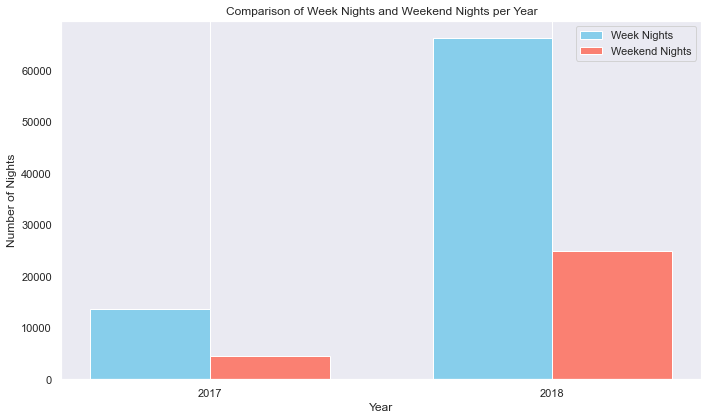

In [24]:
# number of bookings per year during week nights and weekend nights
week_nights_per_year = hotel_df.groupby('arrival_year')['no_of_week_nights'].sum()
# print(week_nights_per_year)
weekend_nights_per_year = hotel_df.groupby('arrival_year')['no_of_weekend_nights'].sum()
# print(weekend_nights_per_year)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(week_nights_per_year))

plt.bar(index, week_nights_per_year, bar_width, label='Week Nights', color='skyblue')
plt.bar(index + bar_width, weekend_nights_per_year, bar_width, label='Weekend Nights', color='salmon')

plt.xlabel('Year')
plt.ylabel('Number of Nights')
plt.title('Comparison of Week Nights and Weekend Nights per Year')
plt.xticks(index + bar_width / 2, week_nights_per_year.index)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


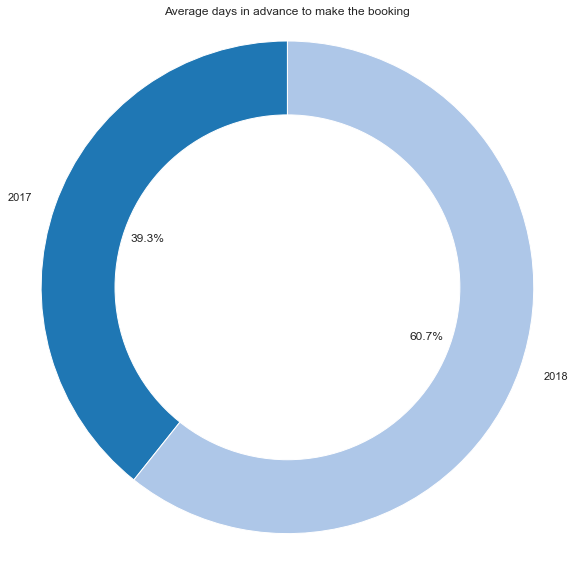

In [25]:
# average days in advance to make the booking
avg_days_in_advance = hotel_df.groupby('arrival_year')['lead_time'].mean()

# creating a donut chart
plt.figure(figsize=(8, 8))

# plotting a pie chart
plt.pie(avg_days_in_advance, labels=avg_days_in_advance.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Average days in advance to make the booking')

# drawing a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


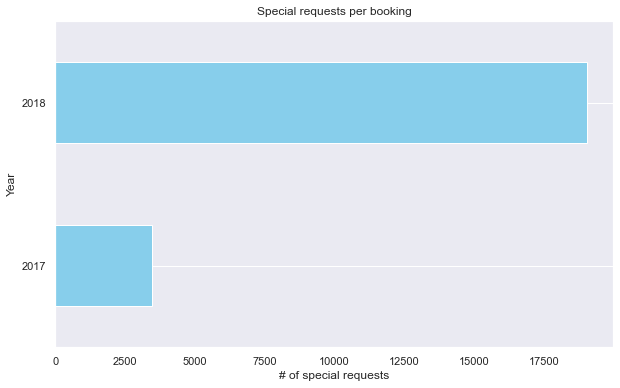

In [26]:
# sum of number of special request per year
special_requests_per_booking = hotel_df.groupby('arrival_year')['no_of_special_requests'].sum()
# print(special_requests_per_booking)

# plotting the graph with reversed axes
plt.figure(figsize=(10, 6))
special_requests_per_booking.sort_values().plot(kind='barh', color='skyblue') 
plt.title('Special requests per booking')
plt.xlabel('# of special requests')
plt.ylabel('Year')
plt.grid(axis='x')  # Grid along the x-axis
plt.show()

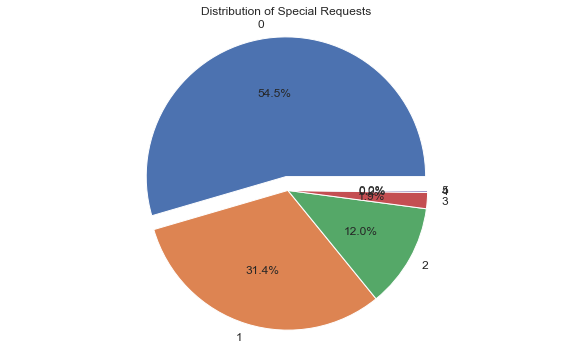

In [27]:
# calculating value counts for special requests
counts = hotel_df['no_of_special_requests'].value_counts()

# determining the index of the largest slice
largest_slice_index = counts.idxmax()

# creating a list to explode the largest slice
explode = [0.1 if idx == largest_slice_index else 0 for idx in counts.index]

# creating a pie chart 
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 12})
plt.title('Distribution of Special Requests')
plt.axis('equal')
plt.show()